**Тренды российского кинопроката**

# Цель иследования

Выявить текущие тренды в данном аналитическом кейсе. Мы будем работать с данными, опубликованными на портале открытых данных Министерства культуры.

# Обзор данных

## Откроем файлы с данными и объединим их в один датафрейм

### Загрузим данные и библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# вывод всех столбцов и строк, независимо от их количества.
pd.set_option('display.max_columns', None)

# отключаем предупреждение
pd.options.mode.chained_assignment = None

In [2]:
try:
    mkrf_movies = pd.read_csv(
        r'...\mkrf_movies.csv',
    )
    mkrf_shows = pd.read_csv(
        r'...\mkrf_shows.csv'
    )
except:
    mkrf_movies = pd.read_csv('.../mkrf_movies.csv')
    mkrf_shows = pd.read_csv('.../mkrf_shows.csv')

### Объединение данных

In [3]:
# выведем датафреймы на экран
print(mkrf_shows.head())
mkrf_movies.head()

    puNumber    box_office
0  111000113  2.450000e+03
1  111000115  6.104000e+04
2  111000116  1.530300e+08
3  111000117  1.226096e+07
4  111000118  1.636841e+08


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
# выведем общую информацию
print(mkrf_shows.info())
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   obj

У датафреймов есть общий столбец *puNumber*, но разный формат данных. Для успешного объединения таблиц необходимо привести формат к одному типу `float64`. Также перед форматированием исключим пропуски.

In [5]:
# фильтрайия и форматирование
data = mkrf_movies.loc[mkrf_movies.loc[:, 'puNumber'] != 'нет']
data.puNumber = data.puNumber.astype('float64')

Объединим данные таким образом, чтобы все объекты из датасета mkrf_movies обязательно вошли в получившийся датафрейм. 
Исмользуем метод `merge()`, который объеденит данные по столбцу *puNumber* из внешней общей области — такие, которые есть хотя бы в одном из датафреймов.

In [6]:
# объединим данные
data = data.merge(mkrf_shows, on='puNumber', how='outer')

### Изучим общую информацию о датафрейме

In [7]:
# сохраним количество сырых данных
data_len_stock = len(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

В представленной таблице есть колонки, которые имеют следующее значение: 

- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма, включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех   фильмов,
- которые получили государственную поддержку;
- ratings — рейтинг фильм на КиноПоиске;
- genres — жанр фильма;
- box_office — сборы в рублях.

In [8]:
# выведем датафрейм на экран
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,1001 рецепт влюбленного кулинара,1811096.0,2010-12-23T12:00:00.000Z,Художественный,"Ле Фильм дю Риваж, Ля Сет Синема, Адам и Ева, ...",Франция-Грузия-Германия-Россия-Украина-Бельгия,Н.Джорджадзе,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
1,Небесный тихоход (новая цветная версия),111000110.0,2010-01-14T12:00:00.000Z,Художественный,"Киностудия ""Ленфильм"", ЗАО ""Киновидеообъединен...","СССР, Россия",И.Цветов (режиссер ч/б фильма - С.Тимошенко),"ЗАО ""Киновидеообъединение ""Крупный план""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8.0,"комедия,военный",NaN
2,И не было лучше брата,111000111.0,2011-01-13T12:00:00.000Z,Художественный,"ООО ""Ибрус"" при поддержке Киностудии ""Азербай...",Россия - Азербайджан,М.Ибрагимбеков,"М.Ибрагимбеков, А.Швыдкой, Д.Шуфутинский",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,детектив,NaN
3,"Детский юмористический киножурнал ""Ералаш"", вы...",111000112.0,2012-01-16T12:00:00.000Z,Художественный,"ООО ""Ералаш""",Россия,"В.Панжев, Г.Курлаев, И.Белостоцкий, М.Сулейман...","ООО ""Ералаш""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",NaN
4,Тайна перевала Дятлова,111000113.0,2013-01-17T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.1,"ужасы,фантастика",2450.0


Все объекты датасета mkrf_movies вошли в объединенный датафрейм data.

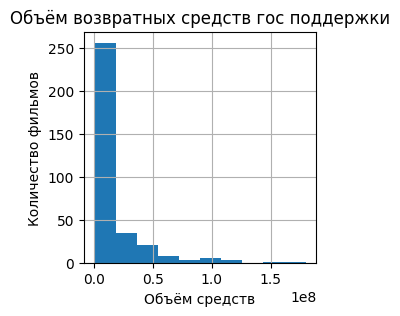

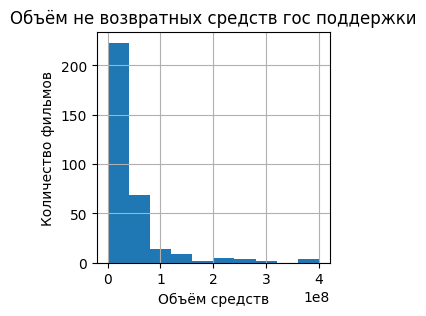

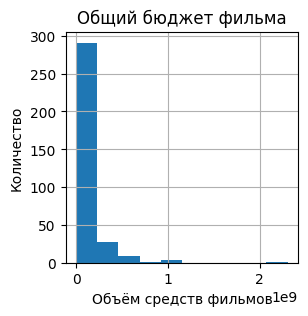

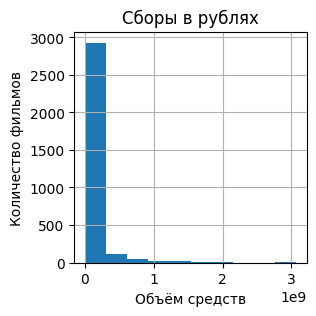

In [9]:
# построим гистограммы всех числовых значений
data.refundable_support.hist(figsize=(3, 3))
plt.title('Объём возвратных средств гос поддержки')
plt.xlabel('Объём средств')
plt.ylabel('Количество фильмов')
plt.show()

data.nonrefundable_support.hist(figsize=(3, 3))
plt.title('Объём не возвратных средств гос поддержки')
plt.xlabel('Объём средств')
plt.ylabel('Количество фильмов')
plt.show()

data.budget.hist(figsize=(3, 3))
plt.title('Общий бюджет фильма')
plt.xlabel('Объём средств фильмов')
plt.ylabel('Количество')
plt.show()

data.box_office.hist(figsize=(3, 3))
plt.title('Сборы в рублях')
plt.xlabel('Объём средств')
plt.ylabel('Количество фильмов')
plt.show()

После изучения общей информации о данных ясно следующее:

- в колонках *puNumber* значения представленны в формате `float64`, а должны быть в виде целого числа;
- в колоке *ratings* значения представленны в формате `object`, а должны быть в виде десятичного числа;
- в колонке *show_start_date* данные о дате представлены в виде `object`, а должны быть в формате даты;
- название столбцов *puNumber* нужно привести к змеиному регистру и к строчному написанию букв;
- колонку *genres* нужно привести к формату `str`;
- все объекты датасета `mkrf_movies` вошли в объединенный датафрейм `data`.

# Предобработка данных

Подготовка данных для анализа называется предобработкой. Нужно оценить масштаб найденных проблем и 
устранить их. Предобработка следует принципу GIGO (от англ. garbage in — garbage out, буквально «мусор на входе — мусор на выходе»). Это значит, что при ошибках во входных данных даже правильный алгоритм работы приведёт к неверным результатам. Так же нужно помнить об законе экономии, который называется **Бри́тва О́ккама**. В нем говорится следующее: *Не следует множить сущее без необходимости.* Суть принципа: совершенство должно быть простым. Если какого-то результата можно достичь с привлечением сущностей A, B и C либо другим путём с привлечением A, B, С и D — надо выбирать первый путь. В плане программирования это значит, что не следут создавать промежуточные переменные, которые не пригодяться в дальнейшем.

## Рассмотрим типы данных в каждом столбце

Для комфортной работы с данными на этапе предобработки необходимо отформатировать данные в нужный нам тип.

### Найдем столбцы, в которых нужно изменить тип данных

Выяснили, в каких колонках есть проблемы с форматом данных. Это столбцы: 

- в колонке *puNumber* значения представленны в формате `float64`, а должны быть в виде целого числа;
- в колоке *ratings* значения представленны в формате `object`, а должны быть в виде десятичного числа;
- в колонке *show_start_date* данные о дате представлены в виде `object`, а должны быть в формате даты;
- название столбца *puNumber* нужно привести к змеиному регистру и к строчному написанию букв;
- колонку *genres* нужно привести к формату `str`.
  
При изменении формата данных используем числа 32 бит, для экономии памяти и быстродействия.

In [10]:
# изменим формат в колонке puNumber
data.puNumber = data.puNumber.astype('int32')

Изменим формат в колонке *ratings*. Для начала иизучим уникальные значения в столбце.

In [11]:
data.ratings.unique()

array(['6.7', '8.0', '7.2', '5.1', '6.1', '5.8', '3.2', '5.3', '6.6',
       '7.3', '3.0', '7.5', '5.4', nan, '5.0', '4.0', '5.9', '4.7', '6.9',
       '6.0', '7.1', '4.5', '4.3', '3.3', '6.8', '5.7', '4.9', '2.8',
       '3.9', '6.2', '6.4', '7.6', '1.9', '6.5', '7.0', '4.8', '99%',
       '4.2', '5.2', '3.8', '3.1', '6.3', '1.5', '4.4', '7.7', '5.6',
       '8.2', '7.4', '3.7', '2.6', '5.5', '7.8', '4.1', '91%', '2.9',
       '8.1', '3.4', '4.6', '7.9', '8.5', '98%', '3.5', '94%', '1.4',
       '8.4', '8.8', '79%', '1.7', '3.6', '2.7', '2.4', '2.5', '8.3',
       '83%', '1.2', '8.7', '1.6', '1.1', '62%', '9.2', '1.0', '89%',
       '90%', '2.1', '8.6', '1.3', '28%', '97%', '9.0', '64%', '88%',
       '8.9', '9.1', '19%', '1.8'], dtype=object)

Присутствуют строковые значения с знаком процентов. Перед форматированием нужно убрать этот знак

In [12]:
# замена методом replace() с словарем
data['ratings'] = data['ratings'].replace(
    {'94%': 9.4, '79%': 7.9, '83%': 8.3, '62%': 6.2, 
     '99%': 9.9, '98%': 9.8, '88%': 8.8, '64%': 6.4,
     '91%': 9.1, '28%': 2.8, '19%': 1.9, '89%': 8.9, 
     '97%': 9.7, '90%': 9.0}
)

# изменим формат в колонке ratings
data.ratings = data.ratings.astype('float32')

In [13]:
# изменим формат в колонке show_start_date
data.show_start_date = pd.to_datetime(data.show_start_date)

# название столбца puNumber к змеиному регистру и строчному написанию
data = data.rename(columns={'puNumber': 'pu_number'})

# колонка genres к формату str
data.genres = data.genres.astype(str)

### Найдём и изучим пропущенные значения в столбцах

In [14]:
# Комментарий ревьюера
temp = data.copy() # создаем копию датасета до преобразования
len(temp)

7485

Выведем количество пропущенных значений для каждого столбца, комбинируя 2 метода.

In [15]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                      0
box_office               4327
dtype: int64

In [16]:
# пропуски визуализация
def pass_value_barh(dfg):
    (
        (dfg.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)    
    )
    plt.title('Пропущенные значения, %' + "\n", fontsize=22, color='SteelBlue')
    plt.xlabel('Процент пропусков', fontsize=22)
    plt.ylabel('Столбцы с пропусками')
    plt.xlim(0, 100)

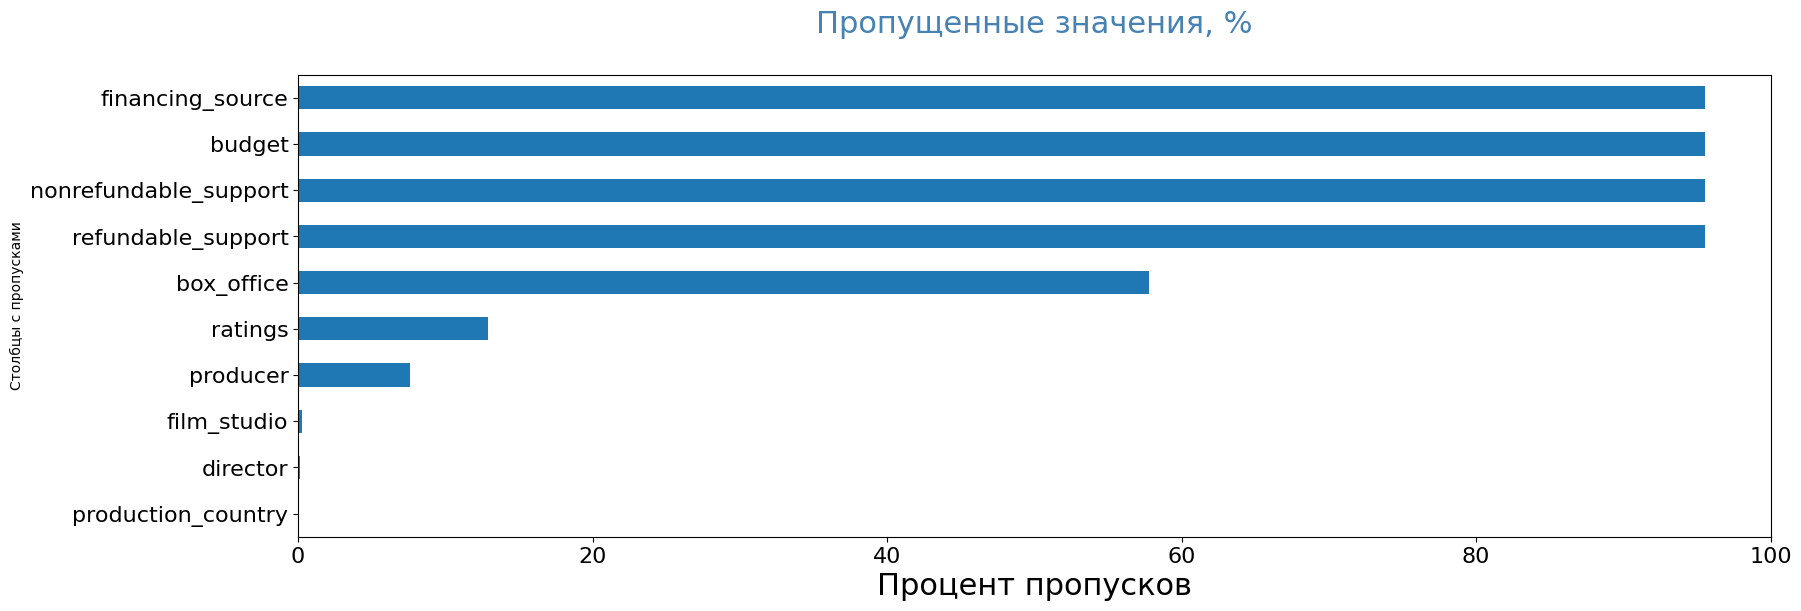

In [17]:
pass_value_barh(data)

### Заполним пропущенные значения там, где это возможно

Исправим столбецы *film_studio, production_country, director*. Количество пропусков в них 29, 
всего 0,3% от общего количесва объявлений, поэтому удалим строки из данных.

In [18]:
data = data.dropna(subset=['film_studio', 'production_country', 'director'])

Исправим столбец *producer*. Количество пропусков в нем 568, всего 7% от общего количесва объявлений. 
Определить продюссера довольно сложно, поэтому заполним пропуски записью *unknow*, чтобы сохранить данные.

In [19]:
data.producer = data.producer.fillna('unknow')

В столбцах *refundable_support, nonrefundable_support, budget, financing_source* большое количество пропусков и оно одинаково. На цели исследования это не повлияет, поэтому оствим пропуски. В столбцах *ratings, box_office, genres* есть пропуски, физически заменить такие пропуски очень сложно. Оставим как есть.

### Проверим дупликаты

Проверим, есть ли в данных дубликаты. Опишем причины, которые могли повлиять на появление дублей.

In [20]:
data[data['pu_number'].duplicated(keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6888,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
6889,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN
7289,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
7290,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN


In [21]:
# количество дублей в столбце title
print(data.title.value_counts().head(10))
data.title.duplicated().sum()

title
День святого Валентина_                               5
Начало_                                               4
Безумцы                                               4
Робин Гуд (Robin Hood)                                4
Жена путешественника во времени                       4
Белая мгла /По комиксу Грега Рукка и Стива Либера/    4
Непокоренный.                                         4
Код доступа "Кейптаун"                                4
Секс в большом городе 2                               4
Там, где живут чудовища                               4
Name: count, dtype: int64


713

Дупликаты появились из-за того, что существуют фильмы с одинаковыми названиями.

### Категориальные значения

Изучим столбцы, которые содержат категориальные значения, это *film_studio, producer, director, genres*. Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах. Исправим проблемные значения в поле *type*.

In [22]:
# столбец type
data.type.unique()

array(['Художественный', ' Художественный', 'Научно-популярный',
       'Анимационный', 'Документальный', ' Анимационный', 'Прочие',
       'Музыкально-развлекательный'], dtype=object)

В столбце есть неявный дупликат с пробелом в названии *Художественный и Анимационный*. Испаравим методом `str.lstrip()`, который убирает пробелы в начале и конце строки, и возвращает копию.

In [23]:
data.type = data.type.str.lstrip()

Алогично в столбцах *producer, director, production_country, film_studio*.

In [24]:
data.producer = data.producer.str.lstrip()
data.director = data.director.str.lstrip()
data.production_country = data.production_country.str.lstrip()
data.film_studio = data.film_studio.str.lstrip()

Неявные дупликаты появились из-за опечатки. Далее проверим столбцы *film_studio, producer, director, genres*. 

In [25]:
print(len(data.film_studio.unique()))
print(len(data.producer.unique()))
print(len(data.director.unique()))
len(data.genres.unique())

5476
5325
4794


742

Предположим, что проблема в категориальных столбцах, это большое количество уникальных значений. 

### Количественные значения

Изучим столбцы, которые хранят количественные значения. Проверим, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

In [26]:
# сводная таблица параметров
(
    data[['refundable_support', 'nonrefundable_support', 'budget', 'box_office']]
    .apply(['count', 'std', 'min', 'mean', 'median', 'max'])   
    .style.format("{:,.2f}")
)

,refundable_support,nonrefundable_support,budget,box_office
count,332.00,332.00,332.00,"3,155.00"
std,"24,916,555.26","59,980,117.92","188,588,333.12","240,455,853.44"
min,0.00,0.00,0.00,0.00
mean,"11,864,457.83","48,980,988.89","127,229,716.68","76,551,328.80"
median,0.00,"30,000,000.00","68,649,916.00","2,338,049.90"
max,"180,000,000.00","400,000,000.00","2,305,074,303.00","3,073,568,690.79"


По таблице ясно, что среднее и медианное значение сборов в рублях после проката в России ниже бюджета фильма. Также количество денег, которое не вернется государству превышает возвратные средства. Есть важный момент, в общий бюджет включена сумма возвратных и невозвратных средств. Проверим, есть ли фильмы не попадающие под это условие.

In [27]:
# количество строк
print(len(data[((data.refundable_support + data.nonrefundable_support) >= data.budget)]))
data[(data.refundable_support + data.nonrefundable_support) >= data.budget].head(1)

17


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
35,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,446163511.0


Присутствуют фильмы, с нулевым бюджетом. Исключим эти строки из общего датафрейма.

In [28]:
data = data[~((data.refundable_support + data.nonrefundable_support) >= data.budget)]

### Добавим новые столбцы

Создадим столбец с информацией о годе проката, выделим год из даты премьеры фильма.

In [29]:
data['year_premiere'] = data.show_start_date.dt.year

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [30]:
# создадим собственную функцию
def split(row):
    row_split = row.split(',')
    return row_split[0]

In [31]:
# столбец main_director
data['main_director'] = data.director.apply(split)

# столбец main_genre
data['main_genre'] = data.genres.apply(split)

Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [32]:
data['decimal_gov_sup'] = ((data.refundable_support + data.nonrefundable_support) / data.budget * 100).round(1)

Посчитаем средства государственной поддержки.

In [33]:
data['money_gov_sup'] = data.refundable_support + data.nonrefundable_support

In [34]:
# количество потерь после фильтрации и предобработки
100 - (len(data) / data_len_stock) * 100

0.5878423513694031

### Исправим аномалии

После преобразования столбца *genres* в стрковый формат образовались аномалии в виде `nan`. Заменим их заглушкой `unknown`.

In [35]:
data.genres = data.genres.replace({'nan': 'unknown'})

### Вывод

- изменили формат данных для удобного использования;
- удалили 0,3% из данных в столбцах *film_studio, production_country, director*;
- заполнили 7% пропусков в столбце *producer* запичью unknow, чтобы сохранить данные;
- в столбцах *refundable_support, nonrefundable_support, budget, financing_source, ratings, box_office, genres* есть пропуски, физически заменить такие пропуски очень сложно, Оставим как есть;
- присутствуют дупликаты из-за того, что существуют фильмы с одинаковыми названиями;
- исключили строки с дупликатами, которые появились из-за опечатки;
- предположим, что проблема в категориальных столбцах, это большое количество уникальных значений;
- исключили фильмы, с нулевым бюджетом;
- добавили столбцы, для детального анализы данных;
- количество потерь после фильтрации и предобработки пределах нормы, 0,6%.

## Исследовательский анализ данных

Исследовательский анализ данных является важным этапом в аналитике, который позволяет лучше понять данные и выявить основные характеристики и закономерности.

### Количество фильмов в год

Посмотрим, сколько фильмов выходило в прокат каждый год.

In [36]:
# сводная таблица количества фильмов
year_premiere = (data.groupby('year_premiere', as_index=False)
 .agg(count_film_premiere = ('title', 'count'),
     count_box_office = ('box_office', 'count'))
 .set_index('year_premiere')
)
year_premiere

,count_film_premiere,count_box_office
year_premiere,,
2010,980,105
2011,620,109
2012,592,127
2013,629,184
2014,804,278
2015,699,459
2016,814,522
2017,503,355
2018,875,470


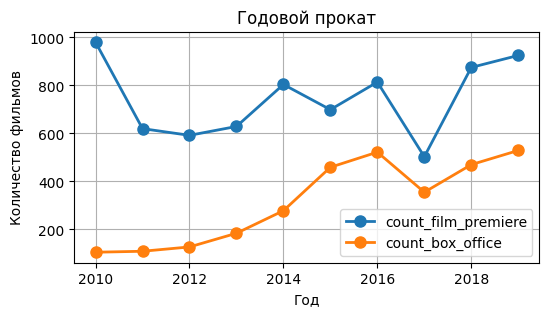

In [37]:
# визуализация
year_premiere.plot(y=['count_film_premiere', 'count_box_office'], figsize=(6, 3), grid=True, marker='o', linewidth=2, markersize=8)
plt.title('Годовой прокат')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.show()

В 2010 году вышло максимальное количество фильмов

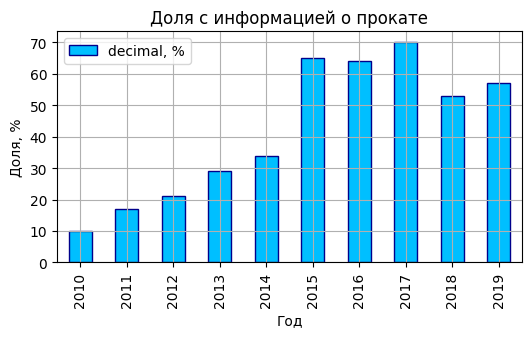

In [38]:
# доля в прокате
year_premiere['decimal, %'] = (year_premiere.count_box_office / year_premiere.count_film_premiere * 100).astype('int32')
year_premiere.plot(y='decimal, %', figsize=(6, 3), grid=True, kind='bar', color='deepskyblue', edgecolor='darkblue')
plt.title('Доля с информацией о прокате')
plt.xlabel('Год')
plt.ylabel('Доля, %')
plt.show()

В 2017 году максимальная доля с информацией о прокате фильмов, но минимальное количество премьер.

### Динамика проката по годам

Изучим, как менялась динамика проката по годам.

In [39]:
# добавим столбец box_sum
year_premiere['box_sum'] = (data.groupby('year_premiere')['box_office'].agg('sum')).astype('int64')
year_premiere

,count_film_premiere,count_box_office,"decimal, %",box_sum
year_premiere,,,,
2010,980,105,10,2428654
2011,620,109,17,14102765
2012,592,127,21,6911073
2013,629,184,29,29799706
2014,804,278,34,7434717843
2015,699,459,65,38527827199
2016,814,522,64,46742121742
2017,503,355,70,48458147253
2018,875,470,53,49251950180


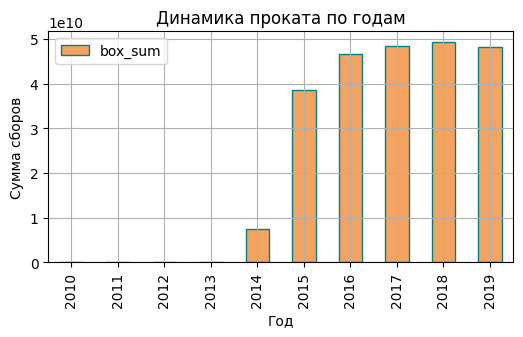

In [40]:
# визуализация
year_premiere.plot(y='box_sum', figsize=(6, 3), grid=True, kind='bar', color='sandybrown', edgecolor='teal')
plt.title('Динамика проката по годам')
plt.xlabel('Год')
plt.ylabel('Сумма сборов')
plt.show()

Минимальная сумма сборов в 2010 году, максимальная в 2018 году.


### Средняя и медиана для каждого года

Посчитаем среднюю и медианную сумму сборов для каждого года

In [41]:
# добавим столбцы в сводную таблицу 
year_premiere['box_mean'] = (data.groupby('year_premiere')['box_office'].agg('mean')).astype('int64')
year_premiere['box_median'] = (data.groupby('year_premiere')['box_office'].agg('median')).astype('int64')
year_premiere

,count_film_premiere,count_box_office,"decimal, %",box_sum,box_mean,box_median
year_premiere,,,,,,
2010,980,105,10,2428654,23130,1700
2011,620,109,17,14102765,129383,3000
2012,592,127,21,6911073,54417,5560
2013,629,184,29,29799706,161954,3522
2014,804,278,34,7434717843,26743589,18137
2015,699,459,65,38527827199,83938621,4784781
2016,814,522,64,46742121742,89544294,3777202
2017,503,355,70,48458147253,136501823,9919415
2018,875,470,53,49251950180,104791383,8821498


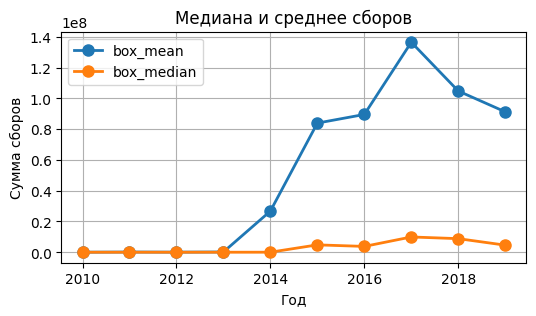

In [42]:
# визуализация
year_premiere.plot(y=['box_mean', 'box_median'], figsize=(6, 3), grid=True, marker='o', linewidth=2, markersize=8)
plt.title('Медиана и среднее сборов')
plt.xlabel('Год')
plt.ylabel('Сумма сборов')
plt.show()

Причина большой разница между средним и медианой заключается в выбросах, то есть присутствуют фильмы с большими сборами.


### Возрастное ограничение аудитории

Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположим, с чем это может быть связано.


In [43]:
# сводная таблица
box_age_restriction = (data.query('year_premiere >= 2015')
                       .pivot_table(index='year_premiere', values='box_office', columns='age_restriction', aggfunc='sum')
                       .astype('int64')
                      )
box_age_restriction.T

year_premiere,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,379054578,150034321,229598930,32449002,17746066
«12+» - для детей старше 12 лет,13419509570,11150762103,7851427660,14267250435,12680198773
«16+» - для детей старше 16 лет,10781600601,16594249489,18694590951,16278405946,12753418984
«18+» - запрещено для детей,5430350628,6793929818,9651495581,8760085501,10121796303
«6+» - для детей старше 6 лет,8517311820,12053146008,12031034131,9913759294,12704941824


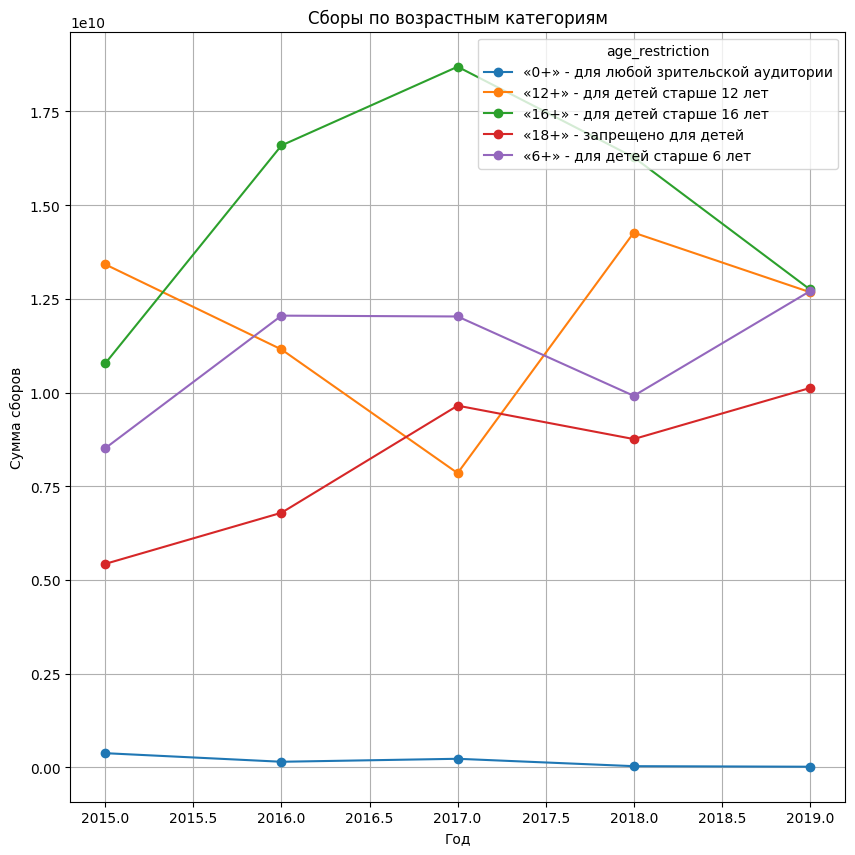

In [44]:
# визуализация
box_age_restriction.plot(figsize=(10, 10), grid=True, marker='o')
plt.title('Сборы по возрастным категориям')
plt.xlabel('Год')
plt.ylabel('Сумма сборов')
plt.show()

Возрастное ограничение аудитории влияет на количество сборов, пик в 2017 году по категории 16+. 


In [45]:
# сводная таблица по жанрам в 2017 году
(data
 .query('year_premiere >= 2017')
 .groupby('main_genre', as_index=False)
 .agg(count_film_premiere = ('title', 'count'),)
 .set_index('main_genre')
 .sort_values(by='count_film_premiere', ascending=False)
 .head()
)

,count_film_premiere
main_genre,
nan,494
драма,466
комедия,214
ужасы,167
мультфильм,163


Пик в 2017 году по категории 16+ обусловлен выходом большого количества фильмов в категории драма.


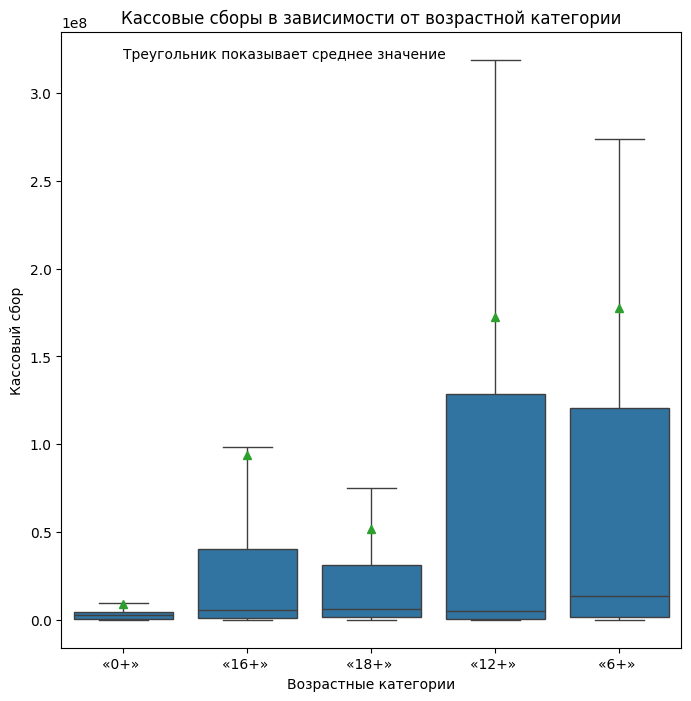

In [46]:
temp = data.copy()

# для удобства укоротим названия категорий
# функция для выбора первого элемента из перечисления
def get_first_value(s, sep = ','):  
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))

# сохраним маску для среза по годам
year_mask = temp['year_premiere'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.2e8,'Треугольник показывает среднее значение')
plt.show()

### Вывод

- в 2010 году вышло максимальное количество фильмов;
- в 2017 году максимальная доля с информацией о прокате фильмов, но минимальное количество премьер;
- минимальная сумма сборов в 2010 году, максимальная в 2018 году;
- причина большой разница между средним и медианой заключается в выбросах, то есть присутствуют фильмы с большими сборами;
- возрастное ограничение аудитории сильно влияет на количество сборов. Пик в 2017 году по категории 16+ обусловлен выходом большого количества фильмов в категории драма.

## Исследуем фильмы, которые получили государственную поддержку

### Средства на поддержку кино

In [47]:
# сводная таблица по жанрам
box_genre = data[data['money_gov_sup'].notna()]
box_genre = (box_genre
             .query('money_gov_sup > 0')
             .groupby('main_genre', as_index=False)
             .agg(money_gov_sup = ('money_gov_sup', 'sum'),
                  sum_box_office = ('box_office', 'sum'),
                  sum_budget = ('budget', 'sum'),
                  rating_genre = ('ratings', 'mean'))
             .set_index('main_genre')
             .sort_values(by='money_gov_sup', ascending=False)
             .round(2)
            )
box_genre[['money_gov_sup','sum_box_office','sum_budget']] = box_genre\
[['money_gov_sup','sum_box_office','sum_budget']].astype('int64')
box_genre['money_gov_sup'] /= 1000000
#box_genre = box_genre[box_genre['rating_genre'].notna()]
box_genre

,money_gov_sup,sum_box_office,sum_budget,rating_genre
main_genre,,,,
драма,5239.406632,9044680590,11051886688,6.42
комедия,2983.282945,12201549025,5915586880,5.52
мультфильм,1931.520000,5044931112,5285499467,5.91
фантастика,1156.000000,679882790,2193100815,6.20
фэнтези,1032.900000,995836607,2340123765,6.09
история,1020.000000,1455468234,2145062206,5.35
триллер,709.645285,475253790,1290960940,5.70
приключения,696.000000,1205596976,3374742189,5.87
nan,550.000000,1480414025,942961454,NaN


Жанр драма лидирует в государственной поддержке, реальное ТВ хуже всего спонсируют.


### Окупаемость фильмов

Проверим, хорошо ли окупаются такие фильмы.


In [48]:
# коэфициен окупаемости
box_genre['ratio'] = (box_genre.sum_box_office / box_genre.sum_budget).round(1)
box_genre.sort_values(by='ratio', ascending=False)

,money_gov_sup,sum_box_office,sum_budget,rating_genre,ratio
main_genre,,,,,
спорт,455.000000,2967768387,710468965,6.93,4.2
комедия,2983.282945,12201549025,5915586880,5.52,2.1
nan,550.000000,1480414025,942961454,NaN,1.6
ужасы,355.000000,710123189,563877625,5.20,1.3
мультфильм,1931.520000,5044931112,5285499467,5.91,1.0
биография,112.510000,516883037,528933637,6.90,1.0
семейный,339.000000,584424749,636799787,5.41,0.9
военный,422.000866,1017670471,1285906825,6.47,0.8
драма,5239.406632,9044680590,11051886688,6.42,0.8


Самый окупаемый жанр спорт, худши для инвестирования жанр детский.


### Рейтинг

Какой рейтинг у спонсируемых государством фильмов.



In [49]:
box_genre.sort_values(by='rating_genre', ascending=False)

,money_gov_sup,sum_box_office,sum_budget,rating_genre,ratio
main_genre,,,,,
криминал,280.000000,239793863,426594781,7.50,0.6
детский,119.000000,3013652,183898004,7.12,0.0
спорт,455.000000,2967768387,710468965,6.93,4.2
биография,112.510000,516883037,528933637,6.90,1.0
детектив,485.000000,138547511,1198222297,6.76,0.1
мюзикл,240.453119,101705004,564197472,6.55,0.2
военный,422.000866,1017670471,1285906825,6.47,0.8
драма,5239.406632,9044680590,11051886688,6.42,0.8
боевик,254.000000,399356496,603436808,6.34,0.7


Самые рейтинговые фильмы в жанре криминал, а ужасы не популярны у зрителей.



### Вывод

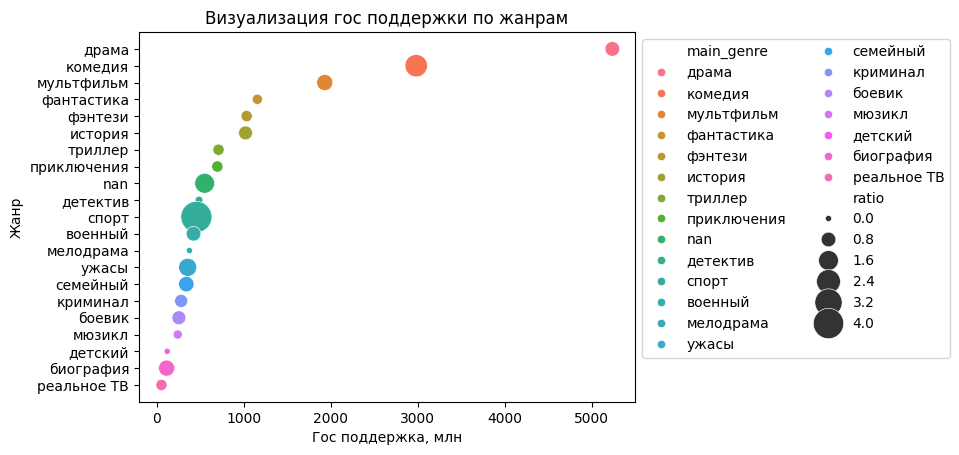

In [50]:
# визуализация гос поддержки по жанрам
sns.scatterplot(data=box_genre, x='money_gov_sup', y='main_genre', size='ratio', legend=True, hue='main_genre', sizes=(20, 500))
plt.rcParams['figure.figsize'] = [8, 8]
plt.legend(bbox_to_anchor=[1, 1], loc='upper left', ncol=2)
plt.title('Визуализация гос поддержки по жанрам')
plt.xlabel('Гос поддержка, млн')
plt.ylabel('Жанр')
plt.show()

- жанр драма лидирует в государственной поддержке, жанр реальное ТВ хуже всего спонсируют;
- самый окупаемый жанр спорт, худши в для инвестирования жанр детский;
- самые рейтинговые фильмы в жанре криминал, а ужасы не популярны у зрителей.



## Общий вывод

В данном проекте выполнили следующие шаги.

Провели предобработку данных:

- все объекты датасета mkrf_movies вошли в объединенный датафрейм data;
- изменили формат данных для удобного использования;
- удалили 0,3% из данных в столбцах *film_studio, production_country, director*;
- заполнили 7% пропусков в столбце *producer* записью unknow, чтобы сохранить данные;
- в столбцах *refundable_support, nonrefundable_support, budget, financing_source, ratings, box_office, genres* есть пропуски, физически заменить такие пропуски очень сложно, Оставим как есть;
- присутствуют дупликаты из-за того, что существуют фильмы с одинаковыми названиями;
- исключили строки с дупликатами, которые появились из-за опечатки;
- предположим, что проблема в категориальных столбцах, это большое количество уникальных значений;
- исключили фильмы, с нулевым бюджетом;
- добавили столбцы, для детального анализы данных;
- количество потерь после фильтрации и предобработки пределах нормы, 0,6%.

Провели сследовательский анализ данных:

- в 2010 году вышло максимальное количество фильмов. Близкое к максимуму количество примьер;
- в 2017 году максимальная доля с информацией о прокате фильмов, но минимальное количество премьер;
- минимальная сумма сборов в 2010 году, максимальная в 2018 году;
- причина большой разница между средним и медианой заключается в выбросах, то есть присутствуют фильмы с большими сборами;
- возрастное ограничение аудитории сильно влияет на количество сборов. Пик в 2017 году по категории 16+ обусловлен выходом большого количества фильмов в категории драма.

Исследовали фильмы, которые получили государственную поддержку:

- жанр драма лидирует в государственной поддержке, жанр реальное ТВ хуже всего спонсируют;
- самый окупаемый жанр спорт, худши в для инвестирования жанр детский;
- самые рейтинговые фильмы в жанре криминал, а ужасы не популярны у зрителей.
